### Importing Libraries

In [64]:
# Before starting, we have to import different libraries such as sklearn, numpy, panads, matplotib etc.
import warnings
# warning library is used to ignore warnings
warnings.simplefilter("ignore")
import numpy as np
# Numpy: it is used to handle n-dimensional array
import pandas as pd
# Pandas: it is used to handle the datasets
import seaborn as sns
# Seaborn: it is also used for data visualization.
import matplotlib.pyplot as plt
# Matplotlib: it is used for data visualization.
from sklearn.cluster import KMeans 
# importing clutering algorithm kmeans.
from sklearn.metrics import silhouette_score
# silhouette_score is a evaluation metrics of kmeans.

### Loading Data

In [65]:
# read_csv function is used to read the dataset and stored as Dataframe
data = pd.read_csv('Wholesale_customers_data.csv')

In [66]:
# head() function is used to extract the records from a dataframe.
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [67]:
# unique() function is used to get the unique vlaues in a column.
data.Channel.unique()

array([2, 1], dtype=int64)

In [68]:
# value_counts() function is used to count the unique() values in a column.
data.Region.value_counts()

3    316
1     77
2     47
Name: Region, dtype: int64

#### Data Visualization

<AxesSubplot:xlabel='Channel', ylabel='count'>

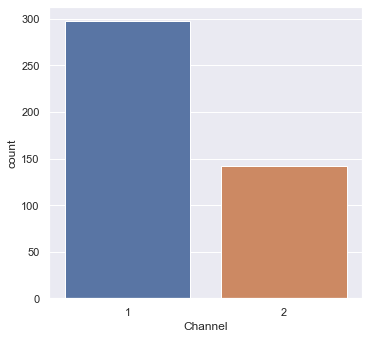

In [69]:
# there are two channels.
# 1: for Hotel/Restaurant
# 2: for retailers
plt.figure(figsize = (5,5))
# set() function is used to set the display
sns.set()
# countplot() counts the number of values and plot in bar-graph
sns.countplot(data['Channel'])

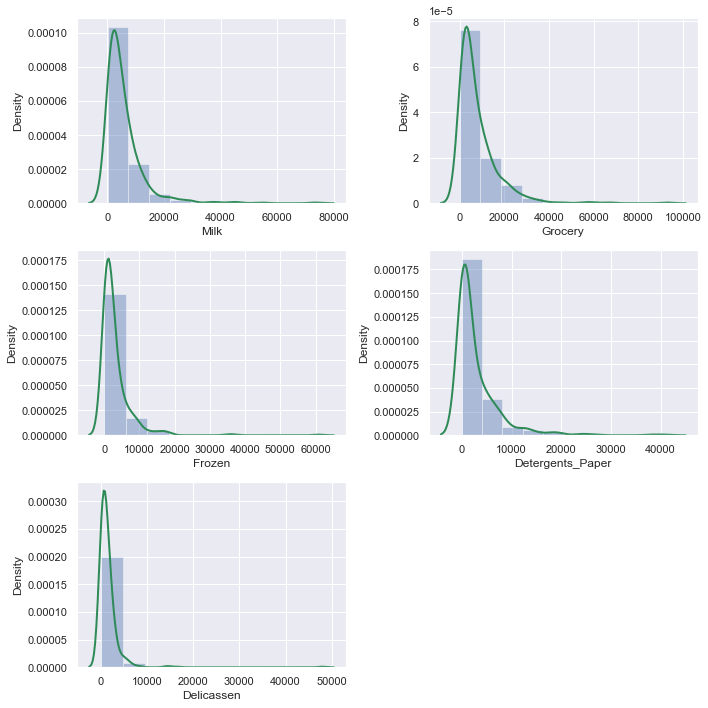

In [73]:
# Distribution of annual spending on different products
# plots are showing that how the records is divided into different products
num_values = data.columns[3:]
# getting 3 to onwards columns and stored into num_values
plt.figure(figsize=(10,10))
# create a figure of width(10) and height(10)
sns.set()
# setting the display
for i, var in enumerate(num_values):# getting index and columns using loop.
    plt.subplot(3,2,i+1) # subdivide the plots into 3 rows and 2 columns
    sns.distplot(data[var], bins=10, kde_kws={'linewidth':2, 'color':'seagreen'})
    plt.tight_layout() # method to fixed the layout so that plots are not overlapped.

#### Data Preprocessing

In [74]:
# this code drops the 'Region' column and stored the dataframe into X variable as features.
X = data.drop(['Region'], axis=1) # for columns we should mention axis = 1

#### Model Traning

In [75]:
# we have intialized the KMeans clutering algorithm.
kmeans = KMeans(    
       init="random", # init = 'random' choose `n_clusters` observations (rows) at random from data
       n_clusters=3, # n_cluster is used to specify the number of clusters
       n_init=10,  # n_init specify the number of time the k-means algorithm will be run with different centroid
      max_iter=300, # max_iter specify maximum number of iterations of the k-means algorithm for a single run.
       random_state=42 # random_state determines random number generation for centroid initialization.
)


In [76]:
# fit function is used to train the model.
kmeans.fit(X.values)
# X.values is he data.

KMeans(init='random', n_clusters=3, random_state=42)

In [77]:
# Inertia defines how well a dataset was clustered by K-Means.
kmeans.inertia_

80333726744.43437

In [78]:
# create a dictionary and put al parameters in it.
kmeans_kwargs = {
       "init": "random", # init = 'random' means it will take random observation from data.
       "n_init": 10, # n_init means it kmeans will work with 10 centroid seeds.
       "max_iter": 300, # max_iter defines maximum iteration during one time run.
       "random_state": 42, # random_state = 42 means that it will take same observation every time the model runs.
    }

In [79]:
# The SSE is defined as the sum of the squared Euclidean distances of each point to its closest centroid
sse = []
# creating an empty list
for k in range(1, 11): # using for loop to take k = 1 to 10
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs) # intilializing the cluster with k  = 1 to 10 with same parameters.
    kmeans.fit(X)
    # fitting the data every time the loop runs.
    sse.append(kmeans.inertia_)
    # calculate the intertia every time and append into the list.

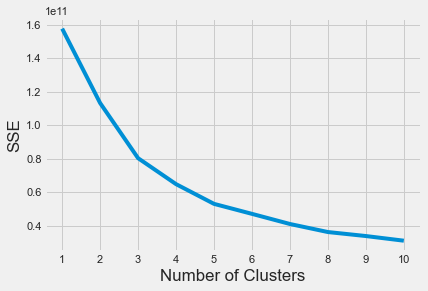

In [80]:
# Visualization of SSE with respect to clusters
plt.style.use("fivethirtyeight")
# use styling grid
plt.plot(range(1, 11), sse)
# plot sse list 
plt.xticks(range(1, 11))
# using edges for every cluster
plt.xlabel("Number of Clusters")
# labeling the x-axis
plt.ylabel("SSE")
# labeling the y-axis
plt.show()

#### Silhouette_coefficient

In [81]:
# I have extracted all the records containing 1st column and stored it into y variable.
# then I have taken records from column 2 to onwards and stored it into x variable.
y = data.iloc[:,0]
x = data.iloc[:, 2:]

In [82]:
# calulating the silhoutte_Score
# The silhouette ranges from −1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.
silhouette_coefficients = []
# create an empty list
for k in range(2, 11): # using loop to take k = 2 to 10
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs) # intilializing the cluster with k  = 2 to 10
    kmeans.fit(x) # fitting the data every time the loop runs.
    score = silhouette_score(X, kmeans.labels_) # calculate silhouette score for each cluster
    silhouette_coefficients.append(score) # append silhouette scores for all clusters into the list.

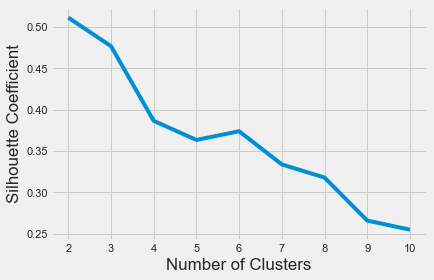

In [83]:
# Visulalization of silhoutte_Score
plt.style.use("fivethirtyeight")
# use styling grid
plt.plot(range(2, 11), silhouette_coefficients)
# plotting the sillhouette scores
plt.xticks(range(2, 11))
# add edges into graph.
plt.xlabel("Number of Clusters")
# label the x-axis
plt.ylabel("Silhouette Coefficient")
# label the y-axis
plt.show()